# IRIS FLOWER EXPLORATORY DATA ANALYSIS

### Modules

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
%matplotlib inline

### Initializing the dataframe

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Observing the Five Points Summary of the dataframe

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking for any Null values

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Changing the column names for better access

In [5]:
df.columns
df.rename(columns={'Id': 'ID', 'SepalLengthCm': 'Sepal_Length', 
                     'SepalWidthCm': 'Sepal_Width', 'PetalLengthCm': 'Petal_Length',
                    'PetalWidthCm': 'Petal_Width', 'Species': 'Species'}, inplace=True)

df.columns

Index(['ID', 'Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

### Dropping the unnecessary columns

In [6]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Relationship between Variables

<Figure size 1500x1500 with 0 Axes>

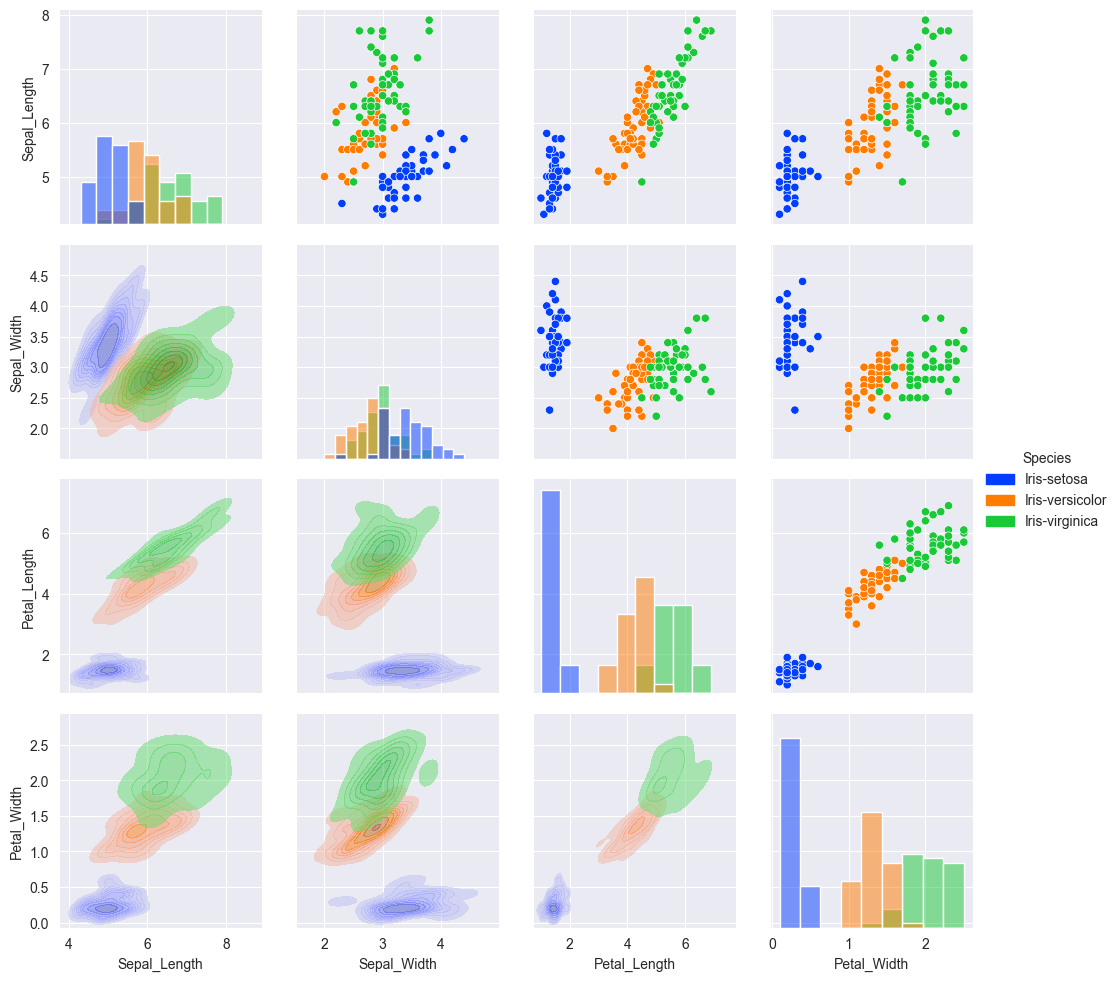

In [7]:
plt.figure(figsize=(15, 15))

iris_grid = sns.PairGrid(data=df, hue='Species', palette='bright')

iris_grid.map_diag(sns.histplot)
iris_grid.map_upper(sns.scatterplot)
iris_grid.map_lower(sns.kdeplot, shade=True, alpha=0.5)

iris_grid.add_legend()

plt.show()

From the Pair Grid above, we can clearly observe that, Iris-Setosa is easily distinguishable from other two species. We can also see that, the Petals of Iris-Setosa is larger when compared to other two species. Similarly, Iris-Versicolor & Iris-Virginca seem harder to distinguish.

### Correlation between the variables

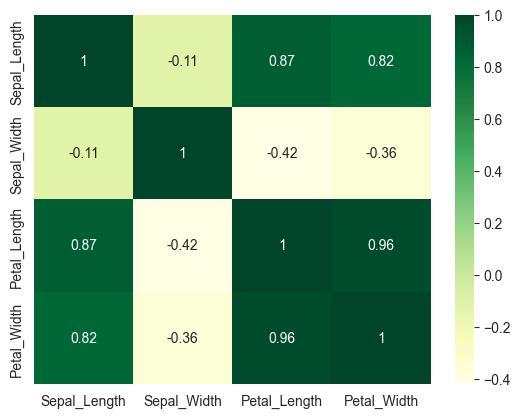

In [12]:
data=df.drop('Species', axis=1).corr()
sns.heatmap(data=data, cmap='YlGn', annot=True)
plt.show()

From the heatmap, we can conclude that, Sepal Length of an Iris flower is positively correlated with Petal Width & Petal Length of the flower whereas, Sepal Width seems to have no correlation with other variables of the Iris Flower.

### Visualizing the Five Points Summary for each Variables of each Species

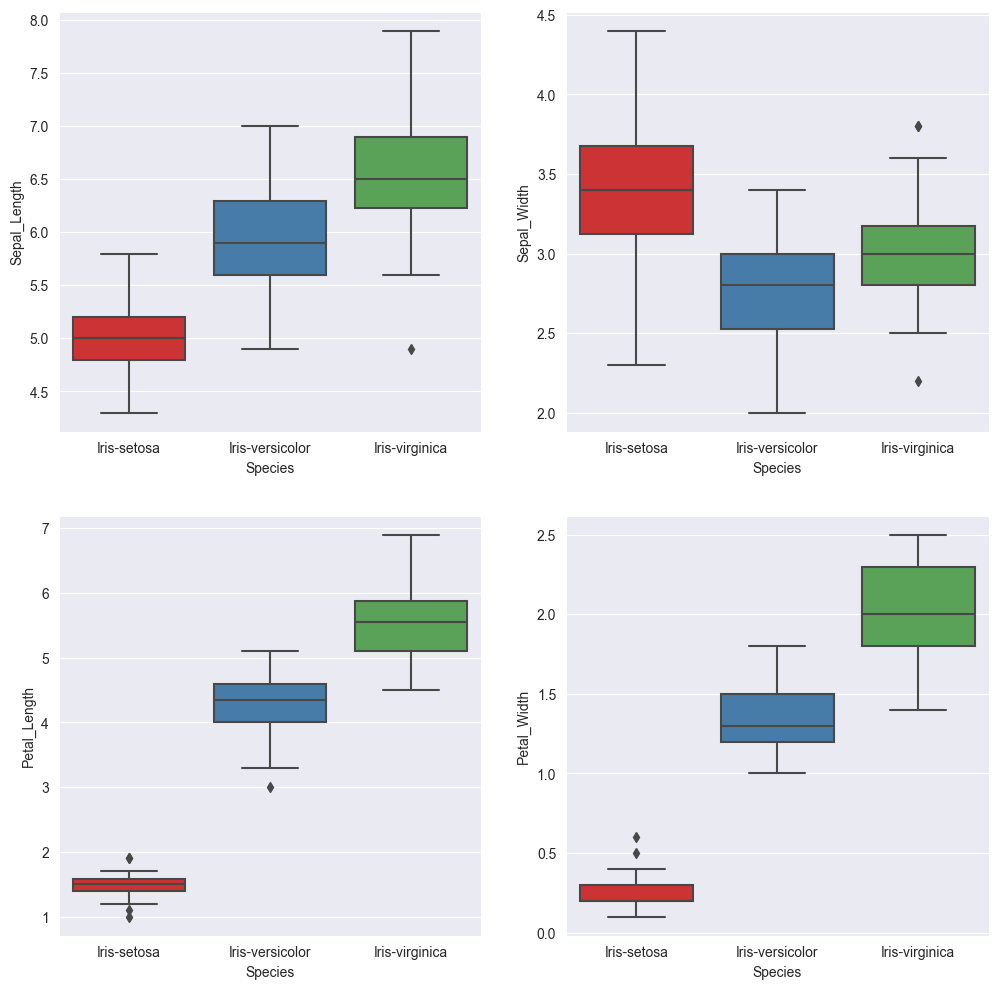

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

sns.boxplot(data=df, y='Sepal_Length', x='Species', palette='Set1', ax=ax[0, 0])
sns.boxplot(data=df, y='Sepal_Width', x='Species', palette='Set1', ax=ax[0, 1])
sns.boxplot(data=df, y='Petal_Length', x='Species', palette='Set1', ax=ax[1, 0])
sns.boxplot(data=df, y='Petal_Width', x='Species', palette='Set1', ax=ax[1, 1])

plt.show()

It seems that, the Petal of Iris-Setosa is dimensionally smaller than Petal of other two species of Iris flower.
But apparently, the Sepal of Iris-Setosa is wider than other two species of Iris. And overall, Iris-Virginica seems to be larger than other two species of Iris.  
BUT, why is the median width of Petal for Iris-Setosa overlaping with 25% of the flowers?  
Is there an error in our visualization??

In [14]:
df[df['Species'] == 'Iris-setosa'].describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [15]:
df[df['Species'] == 'Iris-versicolor'].describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [16]:
df[df['Species'] == 'Iris-virginica'].describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


From the above tables, it is clear that 50% of Iris-Setosa flowers have Petal Width less than or equal to 0.2 cm, which is also the Petal Width for 25% of the flowers.  
We can conclude that the petal of Iris-Setosa is extremely small.

### Visualizing all four variables for each species

In [28]:
fig = go.Figure()


Setosa = df[df['Species'] == 'Iris-setosa']
Versicolor = df[df['Species'] == 'Iris-versicolor']
Virginica = df[df['Species'] == 'Iris-virginica']



fig.add_trace(go.Scatterpolar(
      r=[Setosa['Sepal_Length'].mean(), Setosa['Sepal_Width'].mean(), Setosa['Petal_Length'].mean(), Setosa['Petal_Width'].mean()],
      theta=df.columns,
      fill='toself',
      name='Iris-Setosa'
))

fig.add_trace(go.Scatterpolar(
      r=[Versicolor['Sepal_Length'].mean(), Versicolor['Sepal_Width'].mean(), Versicolor['Petal_Length'].mean(), Versicolor['Petal_Width'].mean()],
      theta=df.columns,
      fill='toself',
      name='Iris-Versicolor'
))

fig.add_trace(go.Scatterpolar(
      r=[Virginica['Sepal_Length'].mean(), Virginica['Sepal_Width'].mean(), Virginica['Petal_Length'].mean(), Virginica['Petal_Width'].mean()],
      theta=df.columns,
      fill='toself',
      name='Iris-Virginica'
))


fig.update_layout(
    width=800,
    height=800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 7]
    )),
  showlegend=True
);



# fig.write_image('Radar Plot for each Species.png')
# fig.show();

<img src='Radar Plot for each Species.png' width=600>

From the Radar plot, we can conclude that flower of Virginica is the largest in size.  
And, Setosa is smallest but its sepal width is larger than other two species of Iris flower.

## Model Training

In [33]:
np.random.seed(42)

#### Removing the setosa species

In [29]:
model_df = df[df['Species'] != 'Iris-setosa']
model_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
X = model_df.drop('Species', axis=1)
y = model_df['Species']

#### Splitting the dataset into train and test sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

#### Train the model

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred = model.predict(X_test)

#### Evaluating the model

In [74]:
accuracy_score(y_test, y_pred)

1.0

#### Predicting the species using a random data

In [75]:
# Sepal_Length	Sepal_Width	Petal_Length	Petal_Width	
# 8 - 5 - 7- 3

model.predict([[1, 4, 2, 1]])

array(['Iris-virginica'], dtype=object)